Simulate brickwork Clifford cellular automata

In [2]:
#Load necessary packages
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
#Parameters for matplotlib
fig_size = [6.9185, 3.4207]
params = {'backend': 'ps',
      'axes.labelsize': 18,
      'font.size': 16,
      'legend.fontsize': 12,
      'axes.titlesize' : 16,
      'xtick.labelsize': 14,
      'ytick.labelsize': 14,
      'xtick.direction': 'in',
      'ytick.direction': 'in',
      'xtick.top' : True,
      'ytick.right' : True,
      'legend.frameon' : False,
      'axes.linewidth' : 1.,
      'lines.linewidth' : 1.3,
      'figure.figsize': fig_size}
      
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)
plt.style.use('seaborn-dark-palette')
plt.rcParams.update(params)

/var/folders/xs/y8sn45v943s2_62flnxw0p940000gn/T/ipykernel_68806/4135101326.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [4]:
#Set printing precision
np.set_printoptions(precision=4)

#Cast tensors to matrices
def tensor_to_matrix(tensor):
    #Given tensor T_abcd...efgh... returns matrix M_{abcd..., efgh...}
    num_row_indices = len(tensor.shape) // 2
    q = tensor.shape[0]
    return tensor.reshape(2 * [q ** num_row_indices])


Section VC of Sommers tells us how to translate the gates to their action on Paulis

In [38]:
def iSWAP(a, b):
    # a and b are tuples of length 2
    # This is the iSWAP update
    a1, a2 = a
    b1, b2 = b
    b1, b2 = b2, b1
    a1, a2 = a2 + b1 + b2, a1 + b1 + b2
    a1 = a1 % 2
    a2 = a2 % 2
    b1 = b1 % 2
    b2 = b2 % 2
    return (a1, a2), (b1, b2)

In [155]:
def RX(a, b):
    # Pi / 2 rotation about the X axis
    b = (a + b) % 2
    return a, b


In [168]:
L = 200
#row_init = [0,0]*(L//2)
#row_init[L//2] = 1
# a = -np.array(L // 2 * [1] + L // 2 * [0]) % d
# b = np.array(((L // 2) + 1) * [1] + ((L // 2) - 1) * [0])
a = np.zeros(L)
b = np.zeros(L)
a[L // 2 - 1] = 1
b[L // 2] = 1

# a = np.random.choice(d, L)
# b = np.random.choice(d, L)

n_t = 100

sim_a = np.zeros([n_t,L],dtype=np.uint8)
sim_b = np.zeros([n_t,L],dtype=np.uint8)
sim_a[0,:] = a
sim_b[0,:] = b

for i in range(1, n_t):
    a, b = RX(a, b)
    for x in range(i % 2, L - i % 2, 2):
        # 2 qubit gate
        a[x:x+2], b[x:x+2] = iSWAP(a[x:x+2], b[x:x+2]) 
        
    sim_a[i,:] = a.astype(int)
    sim_b[i,:] = b.astype(int)
    

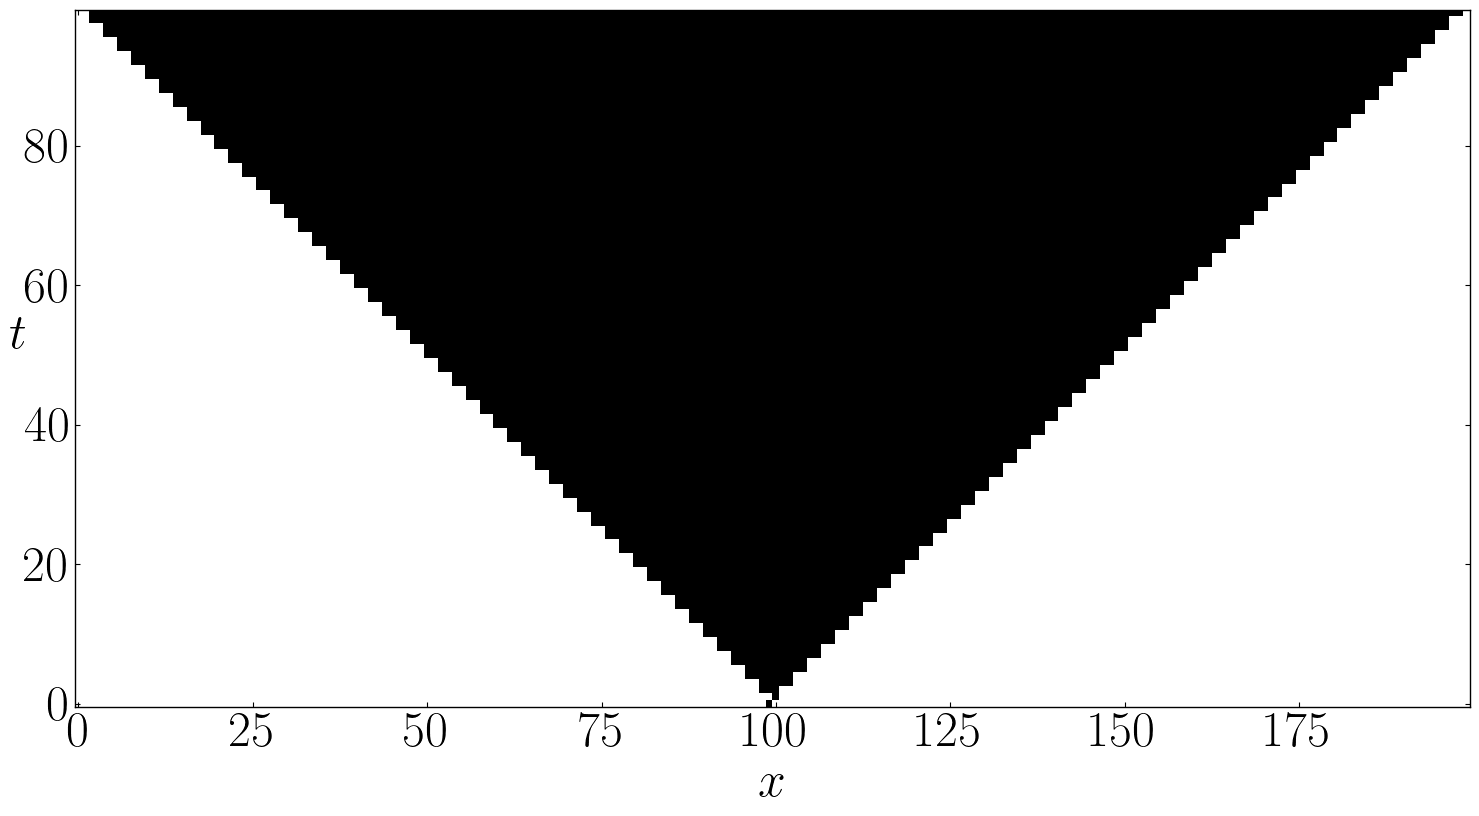

In [169]:
plt.figure(figsize = (18,10))
plt.imshow(sim_a, cmap='Greys',interpolation='nearest', aspect='equal', origin='lower')
plt.xlabel(r'$x$', fontsize=36)
plt.ylabel(r'$t$', fontsize=36, rotation=0)
plt.xticks(fontsize=36, rotation=0)
plt.yticks(fontsize=36, rotation=0)
plt.savefig(f'z{d}-clifford-z.png')
plt.show()

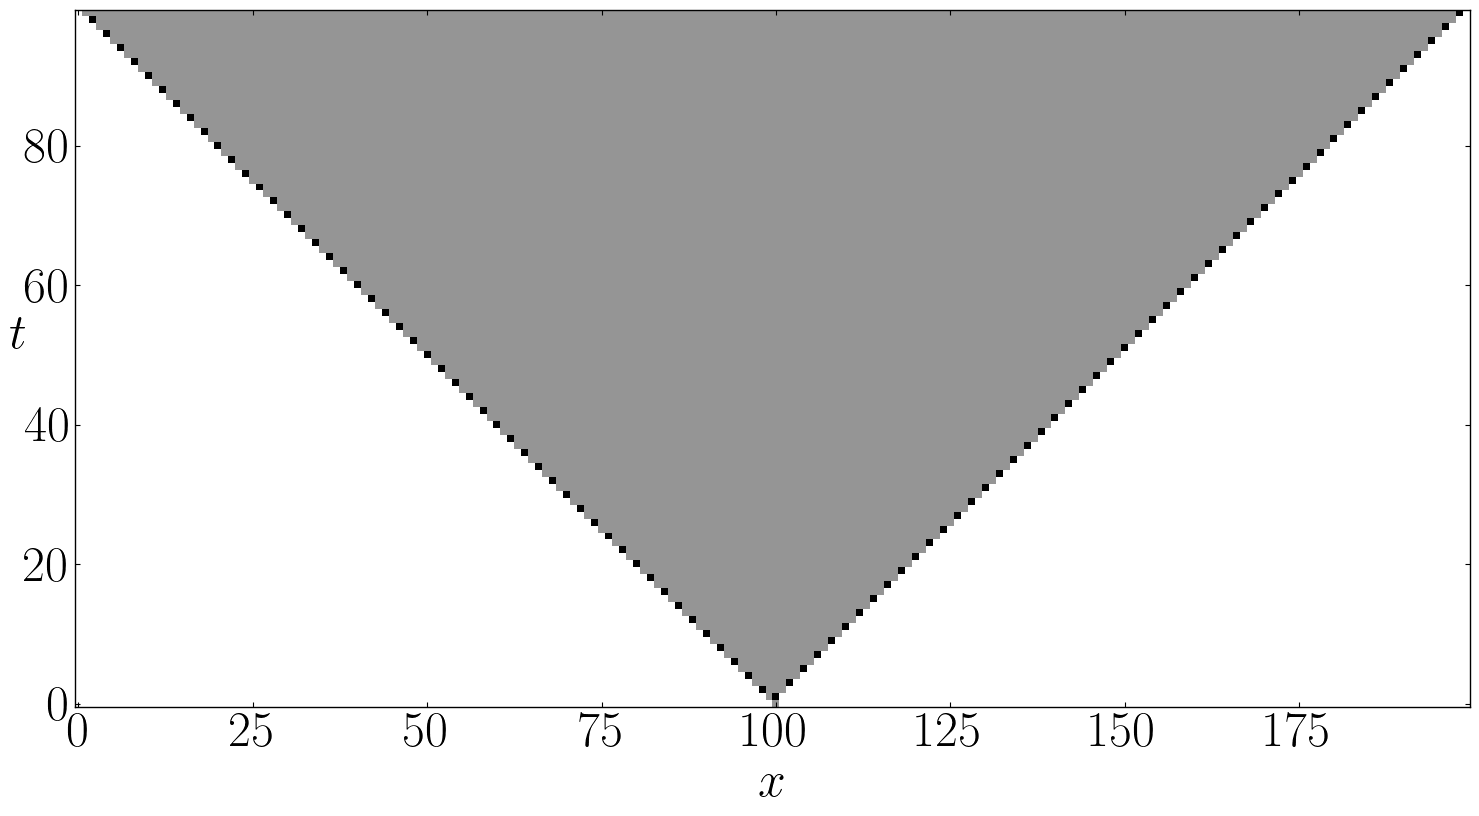

In [163]:
plt.figure(figsize = (18,10))
plt.imshow(sim_b, cmap='Greys', aspect='equal', origin='lower')
plt.xlabel(r'$x$', fontsize=36)
plt.ylabel(r'$t$', fontsize=36, rotation=0)
plt.xticks(fontsize=36, rotation=0)
plt.yticks(fontsize=36, rotation=0)
plt.savefig(f'z{d}-clifford-x.png')
plt.show()